# Capstone Project Report 
## Factors for Success on Broadway

## Loni Wood
## Northwest Missouri State University, Maryville MO 64468, USA
## email: S212226@nwmissouri.edu

- The GitHub link for this project can be found at: https://github.com/lwood7983/L.Wood_Final_Capstone_Project.git
- The Overleaf report for this project can be found at: https://www.overleaf.com/read/qwjkgksxjndz
- The dataset for this project can be found at: https://corgis-edu.github.io/corgis/csv/broadway/
- The dataset was originally gathered by the Broadway League. https://www.broadwayleague.com/home/


In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
broadway = pd.read_csv("original_broadway.csv")
#reading in file

In [2]:
# check for blanks
broadway.info()
# No blank fields
# check for null values
broadway.isnull().any()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date.Day                    31296 non-null  int64 
 1   Date.Full                   31296 non-null  object
 2   Date.Month                  31296 non-null  int64 
 3   Date.Year                   31296 non-null  int64 
 4   Show.Name                   31296 non-null  object
 5   Show.Theatre                31296 non-null  object
 6   Show.Type                   31296 non-null  object
 7   Statistics.Attendance       31296 non-null  int64 
 8   Statistics.Capacity         31296 non-null  int64 
 9   Statistics.Gross            31296 non-null  int64 
 10  Statistics.Gross Potential  31296 non-null  int64 
 11  Statistics.Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


Date.Day                      False
Date.Full                     False
Date.Month                    False
Date.Year                     False
Show.Name                     False
Show.Theatre                  False
Show.Type                     False
Statistics.Attendance         False
Statistics.Capacity           False
Statistics.Gross              False
Statistics.Gross Potential    False
Statistics.Performances       False
dtype: bool

In [3]:
#checking for duplicates
duplicates = broadway.duplicated()
sum(duplicates)
# no duplicates in data set

0

In [4]:
# splitting column names
import re
broadway.columns=[re.split(r'[.]', col)[1] for col in broadway.columns]
broadway.rename(columns={"Gross Potential": "Gross_Potential"}, inplace=True)



In [5]:
broadway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Day              31296 non-null  int64 
 1   Full             31296 non-null  object
 2   Month            31296 non-null  int64 
 3   Year             31296 non-null  int64 
 4   Name             31296 non-null  object
 5   Theatre          31296 non-null  object
 6   Type             31296 non-null  object
 7   Attendance       31296 non-null  int64 
 8   Capacity         31296 non-null  int64 
 9   Gross            31296 non-null  int64 
 10  Gross_Potential  31296 non-null  int64 
 11  Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


In [6]:
#removing non numeric columns.  These will be looked at in Excel
broadway.drop(columns=['Full','Name', 'Theatre', 'Type'], inplace=True)
broadway.shape

(31296, 8)

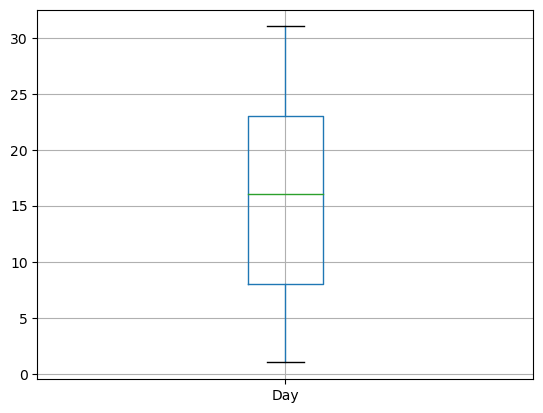

In [7]:
# visualizations


day= broadway.boxplot(column = 'Day')
day.plot()
plt.show()


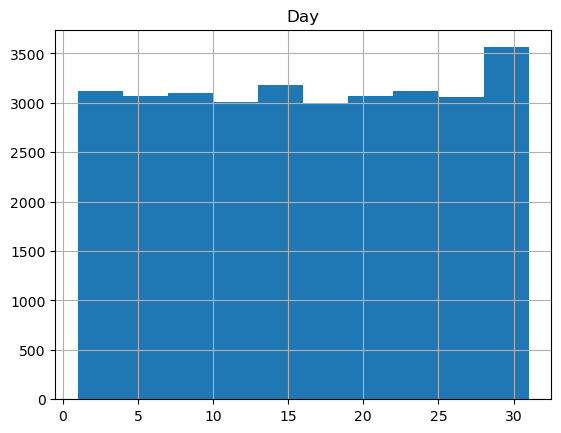

In [8]:
broadway.hist('Day')
plt.show()


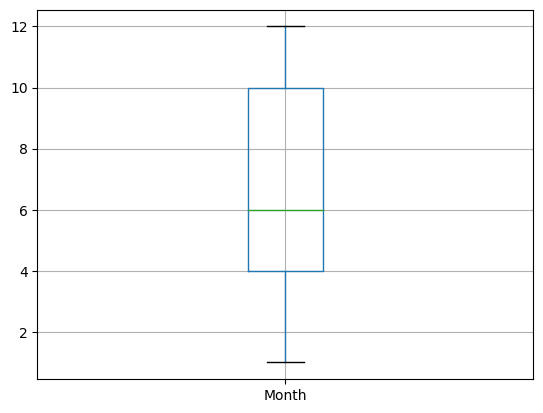

In [9]:
month = broadway.boxplot(column='Month')
month.plot()
plt.show()


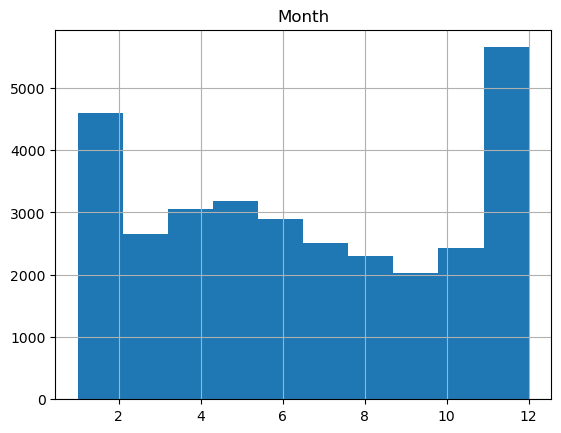

In [10]:
broadway.hist('Month')
plt.show()

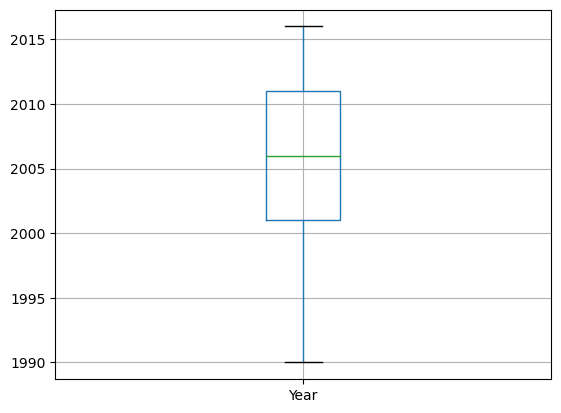

In [11]:
year = broadway.boxplot(column = 'Year')
year.plot()
plt.show()


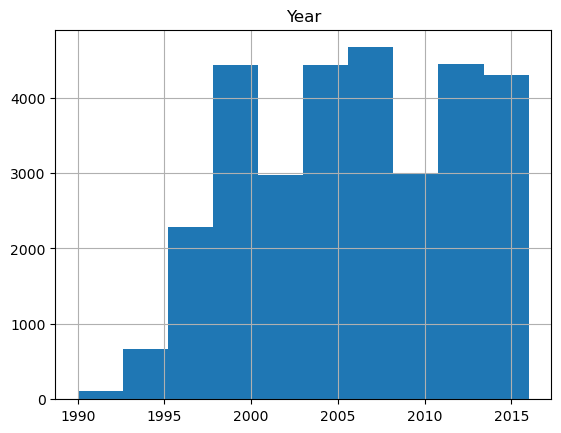

In [12]:
broadway.hist('Year')
plt.show()

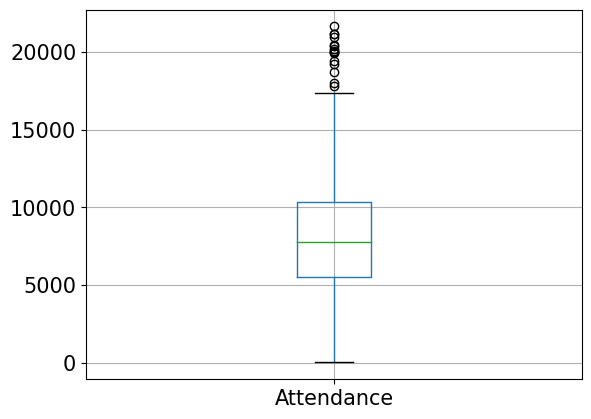

In [13]:
attendance = broadway.boxplot(column='Attendance',fontsize=15)
attendance.plot()
plt.show()

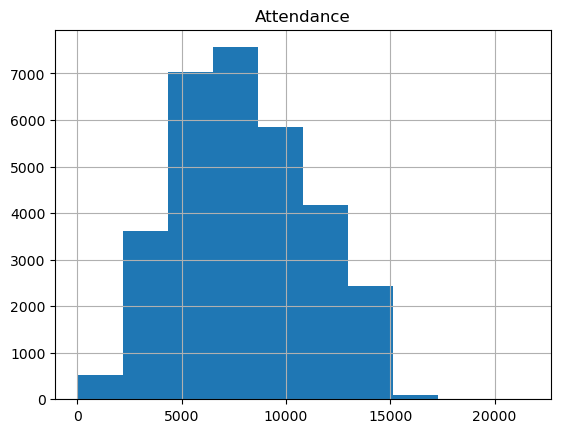

In [14]:
broadway.hist('Attendance')
plt.show()

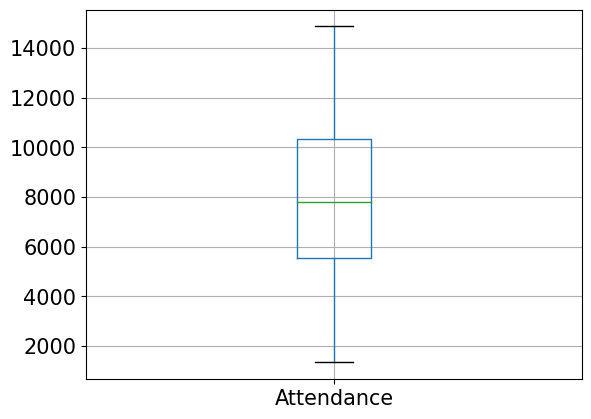

In [15]:
broadway_outliers = broadway[(broadway.Attendance < broadway.Attendance.quantile(.995)) & (broadway.Attendance > broadway.Attendance.quantile(.005))]
attendance_out = broadway_outliers.boxplot(column = 'Attendance', fontsize=15)
attendance_out.plot()
plt.show()

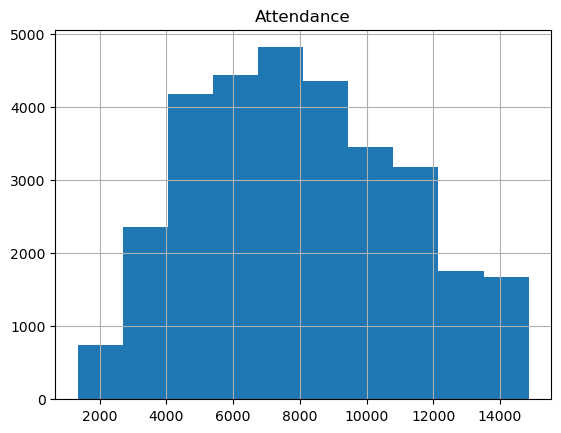

In [16]:
broadway_outliers.hist('Attendance')
plt.show()

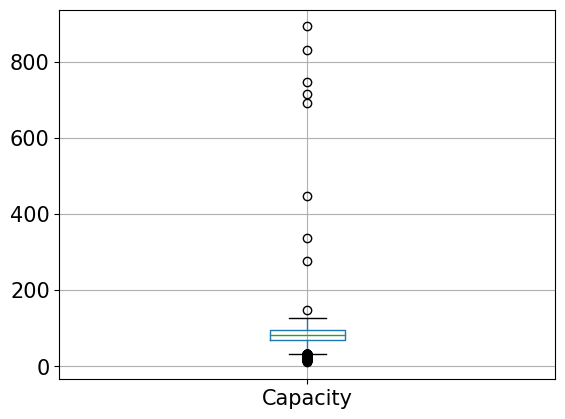

In [17]:
capacity = broadway.boxplot(column = 'Capacity', fontsize=15)
capacity.plot()
plt.show()

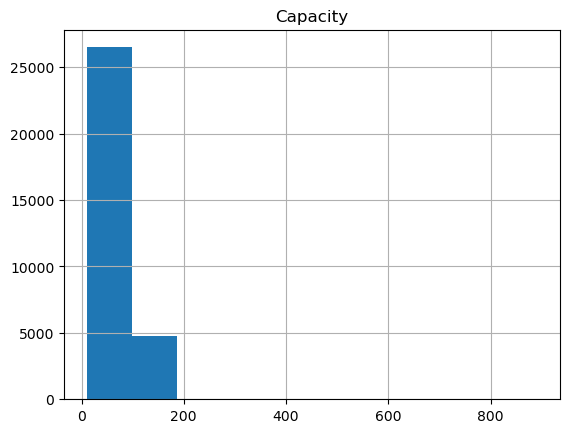

In [18]:
broadway.hist('Capacity')
plt.show()

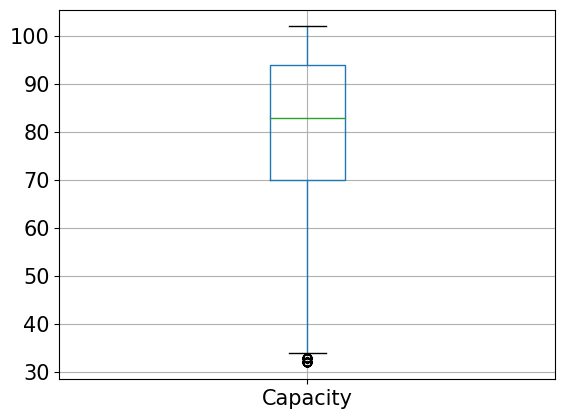

In [19]:
broadway_outliers = broadway[(broadway.Capacity < broadway.Capacity.quantile(.995)) & (broadway.Capacity > broadway.Capacity.quantile(.005))]
capacity_out = broadway_outliers.boxplot(column = 'Capacity', fontsize=15)
capacity_out.plot()
plt.show()

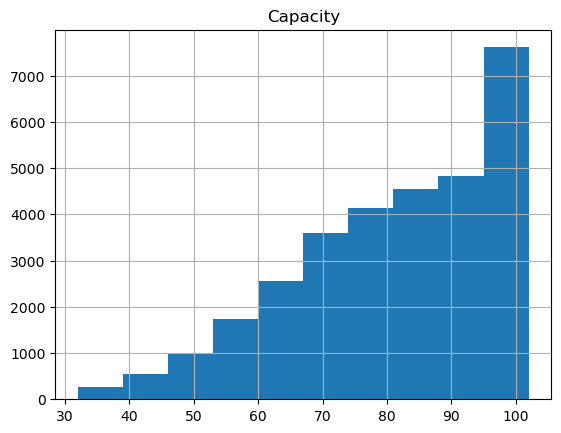

In [20]:
broadway_outliers.hist('Capacity')
plt.show()

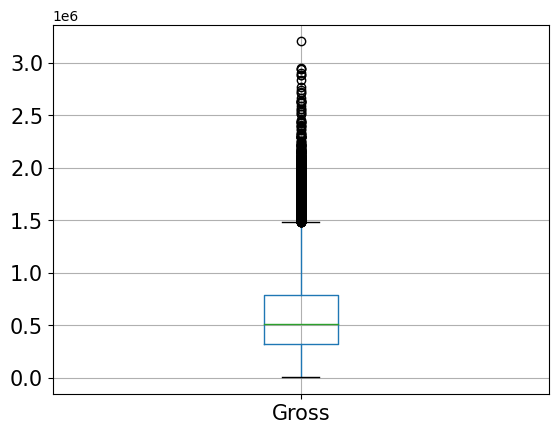

In [21]:
#broadway.hist('Gross')
gross = broadway.boxplot(column='Gross', fontsize=15)
gross.plot()
plt.show()

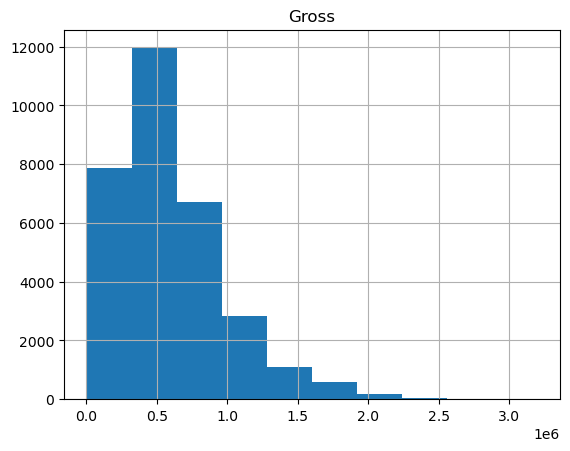

In [22]:
broadway.hist('Gross')
plt.show()

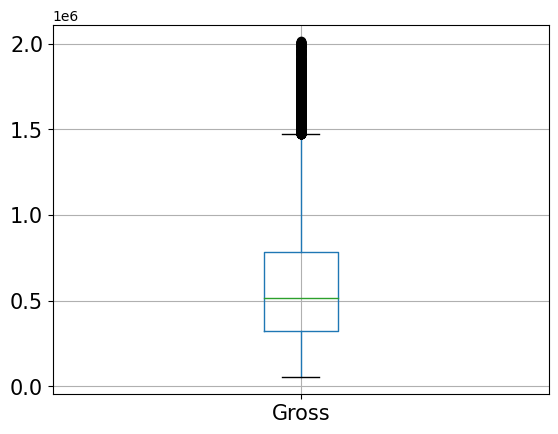

In [23]:
broadway_outliers = broadway[(broadway.Gross < broadway.Gross.quantile(.995)) & (broadway.Gross > broadway.Gross.quantile(.005))]
gross_out = broadway_outliers.boxplot(column = 'Gross', fontsize=15)
gross_out.plot()
plt.show()

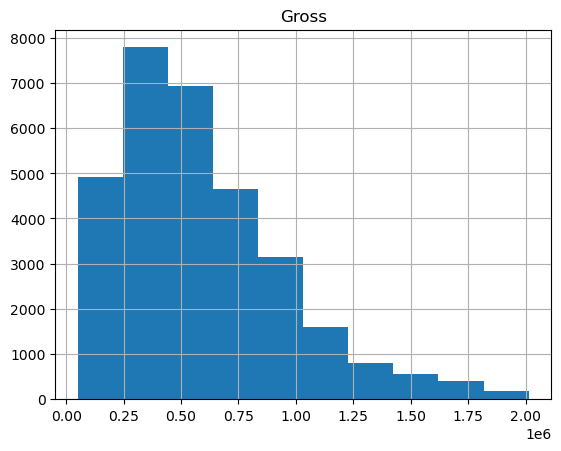

In [24]:
broadway_outliers.hist('Gross')
plt.show()

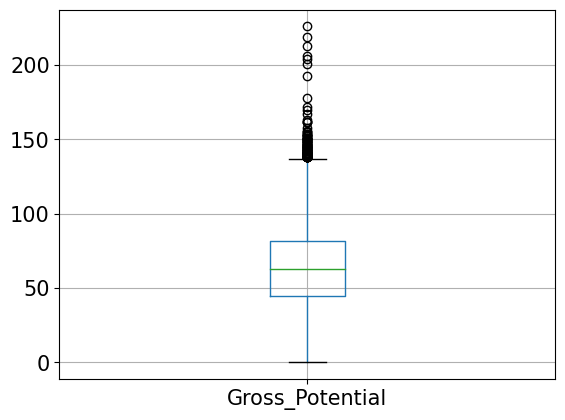

In [25]:
gross_potential = broadway.boxplot(column='Gross_Potential', fontsize=15)
gross_potential.plot()
plt.show()

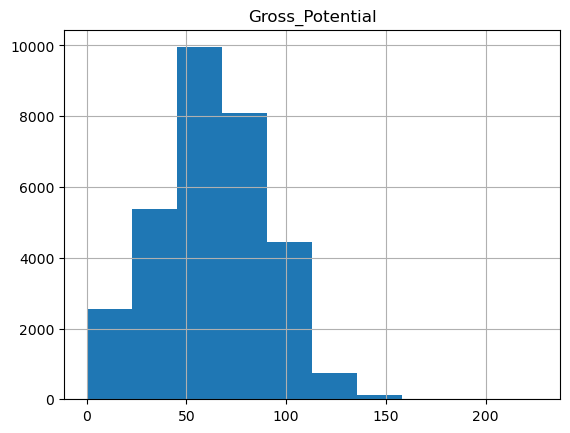

In [26]:
broadway.hist('Gross_Potential')
plt.show()

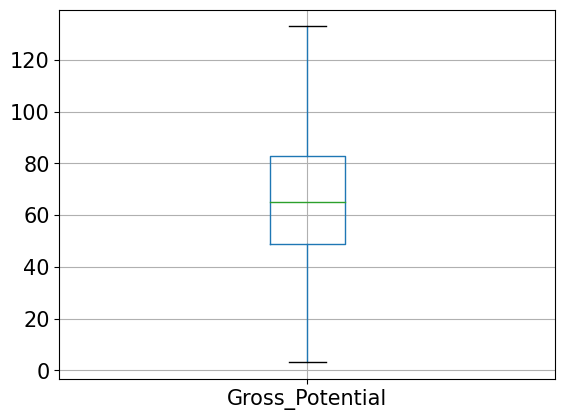

In [27]:
broadway_outliers = broadway[(broadway.Gross_Potential < broadway.Gross_Potential.quantile(.995)) & (broadway.Gross_Potential > broadway.Gross_Potential.quantile(.005))]
gross_potent = broadway_outliers.boxplot('Gross_Potential', fontsize=15)
gross_potent.plot()
plt.show()


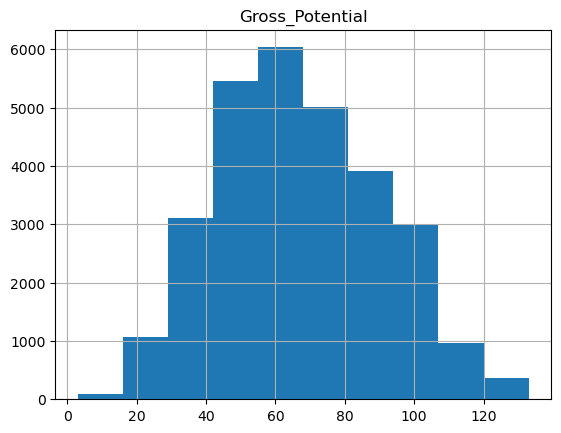

In [28]:
broadway_outliers.hist('Gross_Potential')
plt.show()

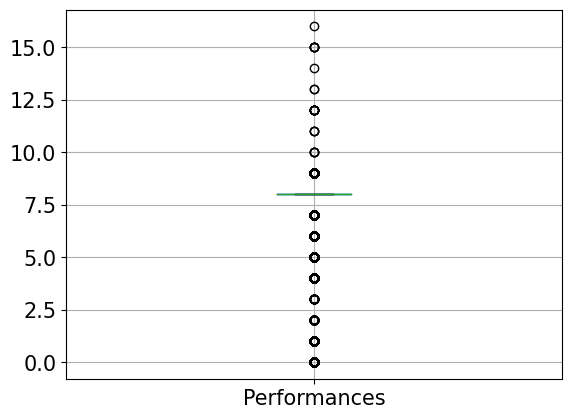

In [29]:
performances = broadway.boxplot(column='Performances', fontsize=15)
performances.plot()
plt.show()

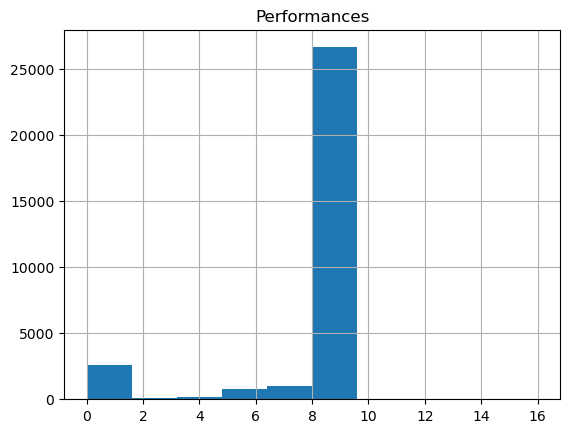

In [30]:
broadway.hist('Performances')
plt.show()

In [31]:
broadway_outliers.shape

(29010, 8)

In [32]:
round(broadway_outliers.corr(),2)

,Day,Month,Year,Attendance,Capacity,Gross,Gross_Potential,Performances
Day,1.00,0.02,-0.01,0.03,0.06,0.03,0.05,0.00
Month,0.02,1.00,-0.06,-0.01,-0.03,0.02,0.02,0.01
Year,-0.01,-0.06,1.00,0.04,0.09,0.40,-0.02,-0.02
Attendance,0.03,-0.01,0.04,1.00,0.51,0.81,0.65,0.26
Capacity,0.06,-0.03,0.09,0.51,1.00,0.52,0.71,0.03
Gross,0.03,0.02,0.40,0.81,0.52,1.00,0.72,0.23
Gross_Potential,0.05,0.02,-0.02,0.65,0.71,0.72,1.00,0.18
Performances,0.00,0.01,-0.02,0.26,0.03,0.23,0.18,1.00


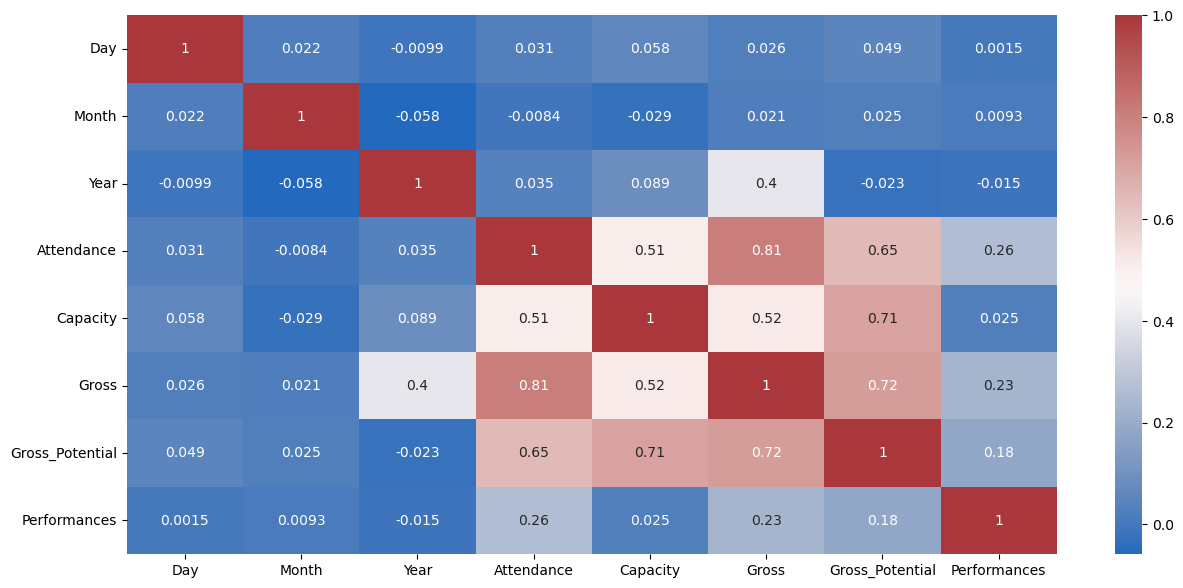

In [33]:
cmap = sns.color_palette("vlag", as_cmap=True)
correlation = broadway_outliers.corr(numeric_only=True)
plt.figure(figsize=(15,7))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap=cmap)
plt.show()

In [34]:
#removing attributes that have little to no correlation
broadway_outliers.drop(columns=['Day','Month'], inplace=True)

C:\Users\loniw\AppData\Local\Temp\ipykernel_29552\1644350308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broadway_outliers.drop(columns=['Day','Month'], inplace=True)


In [35]:
broadway_outliers.info()
#confimring columns were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29010 entries, 53 to 31295
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             29010 non-null  int64
 1   Attendance       29010 non-null  int64
 2   Capacity         29010 non-null  int64
 3   Gross            29010 non-null  int64
 4   Gross_Potential  29010 non-null  int64
 5   Performances     29010 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [36]:
broadway_outliers.shape

(29010, 6)

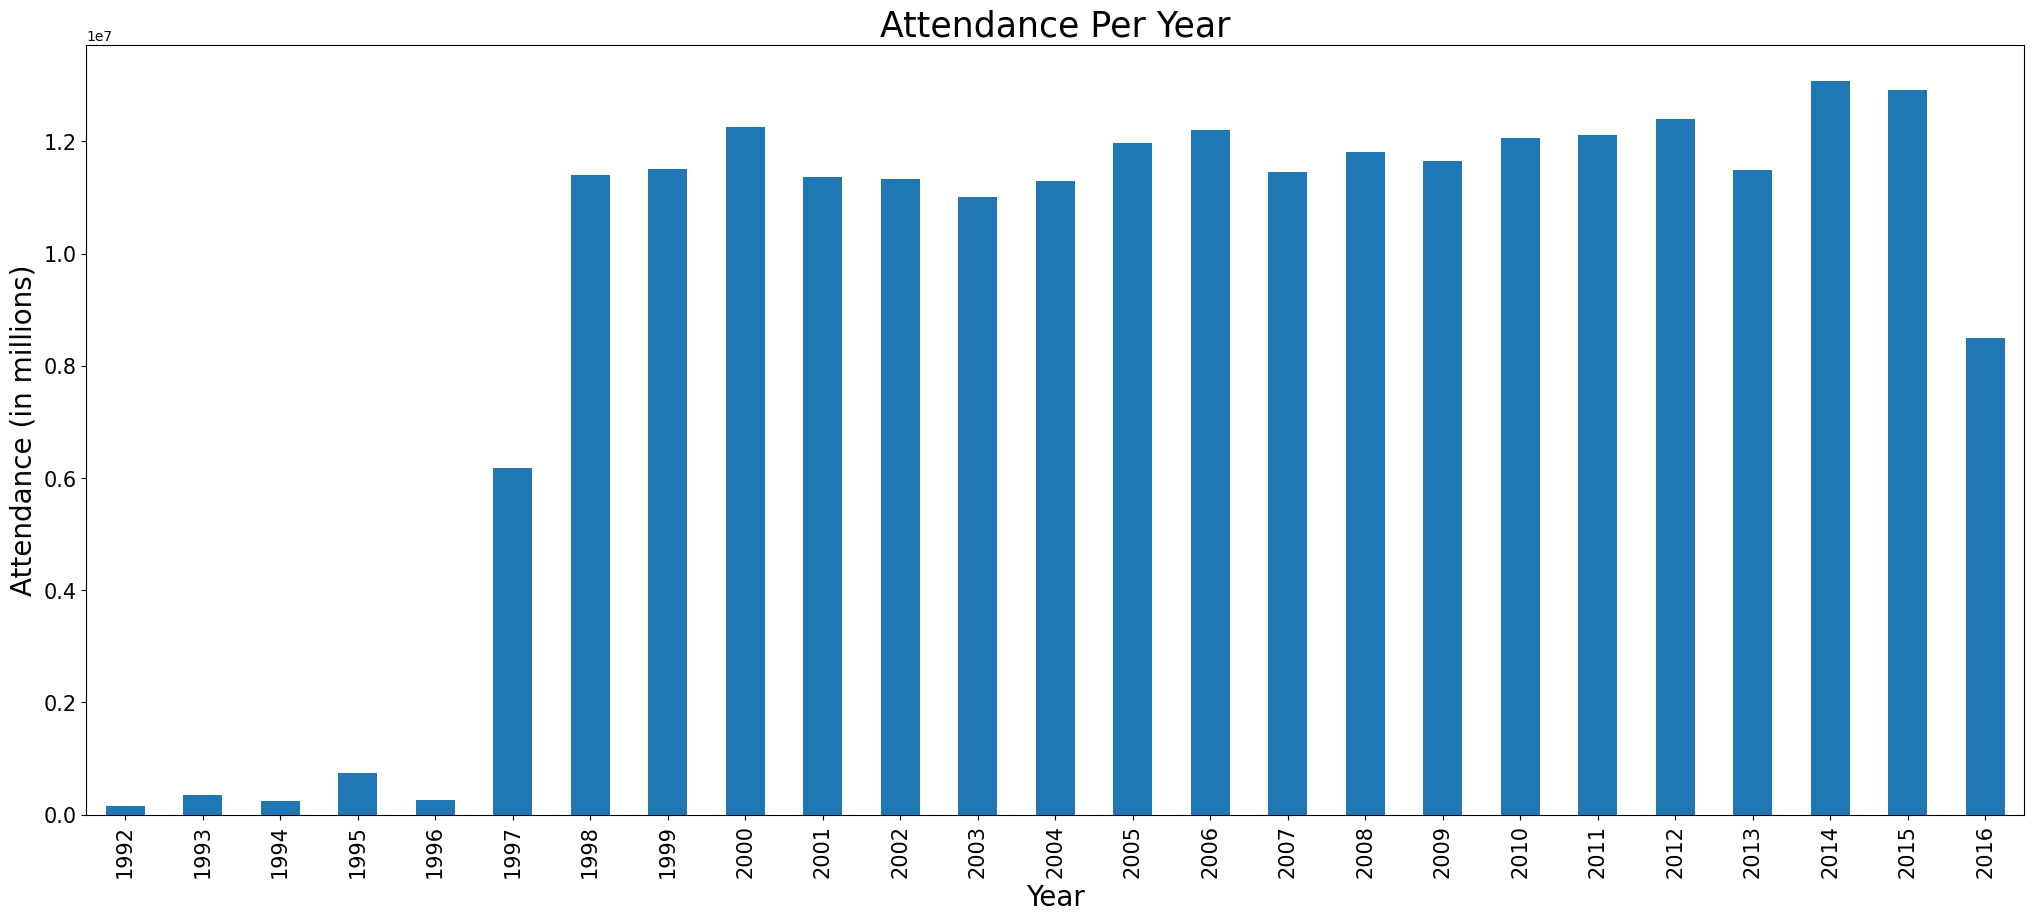

In [37]:
broadway_outliers.groupby('Year')['Attendance'].sum().plot(kind='bar', figsize=(25, 10))
plt.xlabel("Year",fontsize=20)
plt.ylabel("Attendance (in millions)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Attendance Per Year", fontsize=25)
plt.show()


In [38]:
import sklearn as sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(broadway_outliers, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))


#creating train/test split

Train size:  23208 Test size:  5802


In [39]:
broadway_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29010 entries, 53 to 31295
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             29010 non-null  int64
 1   Attendance       29010 non-null  int64
 2   Capacity         29010 non-null  int64
 3   Gross            29010 non-null  int64
 4   Gross_Potential  29010 non-null  int64
 5   Performances     29010 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [40]:
#Train and Evaluate  a Linear Regression Model - starting off by looking at individual attribute-- YEAR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Year']]
y = train_set[['Gross']]

X_test = test_set[['Year']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data using Year')
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data using Year')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for linear regression on training data using Year
  Default settings
Internal parameters:
    Bias is  [-52671218.92930404]
    Coefficients [[26549.01827059]]
    Score 0.15671532515543585
MAE is  269000.7759496788
RMSE is  348993.4322283222
MSE is  121796415738.5045
R^2   0.15671532515543585

Results for linear regression on test data using Year
MAE is  273785.7666590768
RMSE is  353875.3908839846
MSE is  125227792273.29292
R^2     0.16845912772284433


In [41]:
#Train and Evaluate  a Linear Regression Model - starting off by looking at individual attribute --Attendance
X = train_set[['Attendance']]
y = train_set['Gross']

X_test = test_set[['Attendance']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data using Attendance')
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data using Attendance')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for linear regression on training data using Attendance
  Default settings
Internal parameters:
    Bias is  -175773.61134877498
    Coefficients [98.18001095]
    Score 0.6532211174010544
MAE is  154614.45957915587
RMSE is  223798.13932909473
MSE is  50085607167.1649
R^2   0.6532211174010544

Results for linear regression on test data using Attendance
MAE is  158877.3289071861
RMSE is  228260.9344117253
MSE is  52103054178.51396
R^2     0.6540239324402319


In [42]:
#Train and Evaluate  a Linear Regression Model - starting off by looking at individual attribute --Capacity

X = train_set[['Capacity']]
y = train_set['Gross']

X_test = test_set[['Capacity']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data using Capacity')
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data using Capacity')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for linear regression on training data using Capacity
  Default settings
Internal parameters:
    Bias is  -220859.8173892164
    Coefficients [10220.04321214]
    Score 0.26486313309530773
MAE is  226847.9244558106
RMSE is  325847.3936357892
MSE is  106176523939.23698
R^2   0.26486313309530773

Results for linear regression on test data using Capacity
MAE is  232303.94492669753
RMSE is  329217.6047742059
MSE is  108384231293.26523
R^2     0.2803041833237545


In [43]:
#Train and Evaluate  a Linear Regression Model - starting off by looking at individual attribute --Gross_Potential

X = train_set[['Gross_Potential']]
y = train_set['Gross']

X_test = test_set[['Gross_Potential']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data using Gross_Potential')
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data using Gross_Potential')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for linear regression on training data using Gross_Potential
  Default settings
Internal parameters:
    Bias is  -176116.26477020362
    Coefficients [11674.99415286]
    Score 0.5163897195152545
MAE is  196327.3726697285
RMSE is  264288.2846796084
MSE is  69848297418.88974
R^2   0.5163897195152545

Results for linear regression on test data using Gross_Potential
MAE is  198252.18101008117
RMSE is  267398.7991678083
MSE is  71502117796.38588
R^2     0.5252097611661648


In [44]:
#Train and Evaluate  a Linear Regression Model - starting off by looking at individual attribute --Performances


X = train_set[['Performances']]
y = train_set['Gross']

X_test = test_set[['Performances']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data using Performances')
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data using Performances')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for linear regression on training data using Performances
  Default settings
Internal parameters:
    Bias is  314943.9606245919
    Coefficients [39498.02550414]
    Score 0.05397400023721388
MAE is  283145.4887984188
RMSE is  369642.31900703855
MSE is  136635444000.90125
R^2   0.05397400023721388

Results for linear regression on test data using Performances
MAE is  289763.6217374869
RMSE is  377287.89305751165
MSE is  142346154247.77637
R^2     0.05478933134766817


In [45]:
#Train and Evaluate  a Linear Regression Model - all independent variables

X = train_set[['Year','Attendance', 'Capacity','Gross_Potential','Performances']]
y = train_set['Gross']

X_test = test_set[['Year', 'Attendance','Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for multiple regression on training data')
print('Input: Year, Attendance, Capacity, Gross_Potential, Performances')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lr_model.intercept_)
print('   Coefficients', lr_model.coef_)
print('   Score', lr_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for multiple regression on test data')
print('Input: Year, Attendance,Capacity, Gross_Potential, Performances')
print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for multiple regression on training data
Input: Year, Attendance, Capacity, Gross_Potential, Performances
  Default settings
Internal parameters:
   Bias is  -54154841.452145815
   Coefficients [26866.87492095    68.43218493 -2425.31340229  7287.10898229
  2060.36576772]
   Score 0.876164211280937
MAE is   90220.4202041276
RMSE is  133737.5113226712
MSE is  17885721934.78161
R^2     0.876164211280937

Results for multiple regression on test data
Input: Year, Attendance,Capacity, Gross_Potential, Performances
MAE is   91562.34279625445
RMSE is  133737.10177390365
MSE is  17885612390.88346
R^2     0.881235487276907


In [46]:
#Polynomial Regression - multivariate using all independent variables, degree power 2


from sklearn.preprocessing import PolynomialFeatures
power = 2
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year','Attendance','Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year','Attendance', 'Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  2
  Default settings
Internal parameters:
    Bias is  788781109.894893
    Coefficients [-7.75601303e+05 -5.39025811e+03  4.72776649e+05 -1.01708512e+06
 -3.76341413e+05  1.90621309e+02  2.71601309e+00 -2.35699541e+02
  5.06175638e+02  1.84766137e+02 -7.93848159e-04 -4.47730029e-01
  8.58455104e-01  2.49598563e-01 -1.21181046e+00  1.68621784e+01
 -1.38316189e+02 -9.32745792e-02  1.23194148e+02  1.22734799e+03]
    Score 0.9540066448727552
MAE is  53857.86214149822
RMSE is  81503.76965044251
MSE is  6642864467.232394
R^2   0.9540066448727552

Results for polynomial regression on test data
MAE is  54005.14499314301
RMSE is  81724.57225332108
MSE is  6678905709.988297
R^2     0.9556505550475556


In [47]:
#Polynomial Regression - multivariate using all independent variables, degree power 3


power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year', 'Attendance','Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year','Attendance', 'Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  49789099.24355842
    Coefficients [-5.25486245e+01  5.63357872e+04  9.52619457e+04  2.26248714e+06
 -6.79484459e+03 -4.00674137e+01 -5.77049197e+01 -1.52430949e+02
 -2.02304420e+03  2.64380898e+03 -4.33977597e-02  1.73122232e+01
 -3.77441917e+01 -3.80778237e+01  6.30397789e+02  2.58864475e+03
  1.72018462e+04 -7.76441820e+03 -3.44699014e+04 -6.01550529e+05
  1.37947457e-02  1.47729095e-02  5.30007940e-02  4.49221502e-01
 -1.31252290e+00  2.23014504e-05 -8.95228816e-03  1.94823277e-02
  1.99557707e-02 -3.15985203e-01 -1.37034508e+00 -8.40988798e+00
  3.81925347e+00  1.66667002e+01  2.99438473e+02  5.52681740e-08
 -3.05188587e-05  5.92588913e-06 -1.96447560e-04  2.26413913e-03
  4.79810762e-03 -9.99585903e-03 -7.06458775e-03  9.88963404e-03
  1.40264803e-01 -3.75314143e-04 -8.46734764e-05 -1.26081470e+00
  1.46005460e+00  2.10226198e+00 -2.55849207

In [48]:
from sklearn.linear_model import ElasticNet


power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year', 'Attendance','Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year', 'Attendance','Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -24828781.91633803
    Coefficients [-1.41770588e+03 -9.75741406e+01 -4.84444743e+03 -1.10482279e+03
  2.09588384e+02  6.69599968e+00  3.93569139e-02 -5.79489306e-01
  1.17570161e+00 -2.58685485e-01  1.01028895e-03 -2.28961455e-01
  9.58744093e-02  1.51959742e+00  1.79577298e+01 -3.74141133e+01
 -9.61597942e+01 -4.34652738e+01  3.15453534e+02  8.86675653e+01
  1.06711089e-04  1.69362893e-05 -1.10843331e-04  2.07375254e-03
 -6.02721088e-03 -2.11476606e-07 -1.06717101e-04  8.94818441e-05
  2.87500554e-04  1.77158720e-03 -6.19013364e-03 -5.30491925e-02
 -1.89832253e-02  1.53782444e-01  3.82032017e-01  9.15521360e-09
 -6.72014159e-06  3.26089959e-06 -2.77600589e-05  1.86948226e-03
  2.43965243e-03 -2.70005245e-03  1.03631604e-03 -2.87348862e-02
  3.95626959e-02 -1.83121567e-02  7.91255233e-02  1.04912061e+00
  4.76294876e-01 -5.26132403e-01 -4.19824104e-01  1.6

C:\Users\loniw\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+14, tolerance: 3.352e+11
  model = cd_fast.enet_coordinate_descent(


In [49]:

power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year', 'Attendance','Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year', 'Attendance','Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  8
  Default settings
Internal parameters:
    Bias is  -18510712.830560923
    Coefficients [-2.19018485e+03 -2.95613081e+02 -7.34247745e+03 ... -4.70296316e-06
  6.71583498e-05 -4.89489983e-04]
    Score 0.9287635774133893
MAE is  70529.67357335355
RMSE is  101433.45085136642
MSE is  10288744951.616566
R^2   0.9287635774133893

Results for elastic net on test data
MAE is  71900.10217483963
RMSE is  102996.31462004757
MSE is  10608240825.311825
R^2     0.9295588809075634


C:\Users\loniw\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+14, tolerance: 3.352e+11
  model = cd_fast.enet_coordinate_descent(


In [50]:
#Multiple Regression - removing Attendance because attedance is unknown prior to show, it could be estimated
X = train_set[['Year', 'Capacity','Gross_Potential','Performances']]
y = train_set['Gross']

X_test = test_set[['Year', 'Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for multiple regression on training data')
print('Input: Year, Capacity, Gross_Potential, Performances')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lr_model.intercept_)
print('   Coefficients', lr_model.coef_)
print('   Score', lr_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for multiple regression on test data')
print('Input: Year,  Capacity, Gross_Potential, Performances')
print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for multiple regression on training data
Input: Year, Capacity, Gross_Potential, Performances
  Default settings
Internal parameters:
   Bias is  -57158664.845567234
   Coefficients [28357.69843819  -977.76146528 12119.16754464 18066.16173097]
   Score 0.7027750853127519
MAE is   156528.89799509937
RMSE is  207191.89167234136
MSE is  42928479974.76324
R^2     0.7027750853127519

Results for multiple regression on test data
Input: Year,  Capacity, Gross_Potential, Performances
MAE is   159291.23587070606
RMSE is  209507.2902693212
MSE is  43893304675.993614
R^2     0.7085385265137604


In [51]:
#Polynomial Regression - multivariate removing Attendance, degree power 2

power = 2
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year','Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year','Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  2
  Default settings
Internal parameters:
    Bias is  19858543.278547857
    Coefficients [-1.71409497e+04  4.27979064e+05 -1.23064133e+06 -1.92464210e+06
  3.63049826e+00 -2.12989042e+02  6.13828559e+02  9.19373820e+02
 -2.60831059e+00  4.32622730e+01 -5.78643945e+02 -2.23142302e-01
  1.02997721e+03  1.02821572e+04]
    Score 0.7601653677541345
MAE is  140666.8380427282
RMSE is  186117.02325801813
MSE is  34639546346.42566
R^2   0.7601653677541345

Results for polynomial regression on test data
MAE is  142265.90529065003
RMSE is  187424.36963259967
MSE is  35127894332.177345
R^2     0.7667428342864101


In [52]:
#Polynomial Regression - multivariate removing Attendance, degree power 3


power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year','Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year','Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  720282456528.6305
    Coefficients [-1.07432482e+09 -1.37216397e+08  7.47896681e+07  5.50799862e+07
  5.34126453e+05  1.36653008e+05 -7.50190298e+04 -4.99118772e+04
  3.49947308e+03 -1.86619887e+03  7.23487996e+04  3.51814343e+03
 -1.15054050e+05 -1.23589936e+06 -8.85173434e+01 -3.40218032e+01
  1.88138880e+01  1.11787370e+01 -1.74826986e+00  8.60435067e-01
 -3.41999662e+01 -1.73506403e+00  5.48861895e+01  6.21561863e+02
  1.57768088e-03 -3.06427483e-01 -1.15805594e+01  2.41863898e+00
  5.66671735e+00 -3.32551984e+02 -1.51002090e+00  6.96056456e+00
  5.38397609e+02 -6.39168573e+02]
    Score 0.7735165668067738
MAE is  137386.2045699037
RMSE is  180862.43346987056
MSE is  32711219840.643356
R^2   0.7735165668067738

Results for polynomial regression on test data
MAE is  139789.57850372934
RMSE is  187954.32914785127
MSE is  35326829845.418816
R^2  

In [53]:
#Elastic Net degree 3, no attendance


power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year', 'Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year', 'Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Elastic net regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Elastic net regression with degree  3
  Default settings
Internal parameters:
    Bias is  -27325666.441072106
    Coefficients [-4.48166970e+02 -1.67987355e+04 -6.31568328e+03 -1.30707752e+03
  7.45873284e+00  3.44461630e+00  1.45868334e+00 -2.51183907e+01
  1.58495390e+01 -2.08622201e+01 -3.05619670e+02 -3.14833617e+01
 -3.11321287e+02  6.16274394e+02 -2.13029242e-04  1.79749286e-03
  3.38445293e-03  1.33613401e-02 -4.02091705e-03 -1.08942248e-02
 -1.84805660e-01 -1.18713181e-02 -1.40423928e-01  9.34999544e-01
 -5.67682808e-03  5.10045793e-02  1.01457637e+00  1.13017245e+00
 -4.27163890e+00  4.40160222e+01 -4.08950709e-01  4.08429809e+00
  1.58734357e+02 -3.49524796e+02]
    Score 0.7374424537917903
MAE is  147756.67024284336
RMSE is  194734.27700356772
MSE is  37921438640.10224
R^2   0.7374424537917903

Results for elastic net on test data
MAE is  149211.06320980302
RMSE is  195971.84644093376
MSE is  38404964597.46892
R^2     0.7449823463192

C:\Users\loniw\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.406e+14, tolerance: 3.352e+11
  model = cd_fast.enet_coordinate_descent(


In [54]:
#Elastic Net degree 8, no attendance


power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Year', 'Capacity','Gross_Potential','Performances']]
y = train_set['Gross']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Year', 'Capacity','Gross_Potential','Performances']]
y_test = test_set['Gross']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Elastic Net regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

C:\Users\loniw\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.188e+14, tolerance: 3.352e+11
  model = cd_fast.enet_coordinate_descent(


Results for elastic net on training data
Elastic Net regression with degree  8
  Default settings
Internal parameters:
    Bias is  -27479894.066040628
    Coefficients [ 3.52079591e+02 -2.59405574e+04 -1.78978112e+04 -3.26563080e+03
  8.26295957e+00  7.53830696e+00 -1.84149299e+00 -2.82659990e+01
  1.23033255e+01  5.04121299e-01  5.58045715e+01 -2.23998843e+01
 -2.00307533e+02 -1.60652081e+03 -5.10960913e-04  1.96926394e-03
  1.62196610e-03  9.06105275e-03 -4.88613977e-03 -3.41253716e-04
 -1.57813234e-02 -6.76419857e-03 -8.99333285e-02 -8.83784667e-01
  2.05580630e-04  2.60241032e-01  1.70417556e+00 -1.01393015e-01
  1.74496022e-02  6.68999553e-01 -3.90189083e-02 -1.20233826e+00
  7.84053391e+00  4.35371856e+01 -1.00544767e-07  3.24649953e-07
  8.81489124e-07  3.14097440e-06 -1.65742995e-06 -8.47513894e-07
 -2.02000904e-05 -1.68641662e-06 -3.83054612e-05 -3.64424938e-04
  7.26165888e-07  9.49623702e-05  6.37180644e-04 -2.19324163e-05
  4.30151173e-05 -2.33480564e-03 -6.22806496e-06 -4